# Approximating the sine function with an MLP

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [11]:
# Biblioteca de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from rbf_keras.rbflayer import RBFLayer, InitCentersRandom
from rbf_keras.kmeans_initializer import InitCentersKMeans

# Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

## Etapa 02
Criar a base de dados sintética.

In [2]:
NUM_SAMPLES = 500

x_train = np.random.uniform(0, 1, NUM_SAMPLES)
x_train = np.sort(x_train, axis = 0)
y_train = np.sin(2 * np.pi * x_train)

x_test = np.random.uniform(0, 1, int(NUM_SAMPLES/3))
x_test = np.sort(x_test, axis = 0)
y_test = np.sin(2 * np.pi * x_test)

## Etapa 03
Conhecer a dimensão dos conjuntos da base de dados.

In [3]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (500,)
y_train (500,)
x_test (166,)
y_test (166,)


## Etapa 04
Construir a rede neural utilizando o Keras.

In [4]:
x_train = x_train[:, None]

x_train.shape

(500, 1)

In [12]:
keras.backend.clear_session(
    free_memory = True
)

rbflayer = RBFLayer(10,
                    initializer=InitCentersRandom(x_train),
                    betas=2.0,
                    input_shape=((1,))
                   )


model = Sequential()
model.add(rbflayer)
model.add(Dense(1))
model.summary()

/home/fbaltor/fbaltor/ita/2024/2_sem/et-287/notebooks/unit3_rbf_sine/rbf_keras/rbflayer.py:60: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rbf_layer (RBFLayer)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

## Etapa 05
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [13]:
otimizador = keras.optimizers.Adam()
model.compile(optimizer= otimizador,
              loss='mse',
              metrics=['mae'])

## Etapa 06
Treinar o modelo e realizar a validação.

Epoch 1/100
8/8 - 1s - 91ms/step - loss: 0.8828 - mae: 0.7607 - val_loss: 0.8101 - val_mae: 0.7100
Epoch 2/100
8/8 - 0s - 7ms/step - loss: 0.7563 - mae: 0.7055 - val_loss: 0.6984 - val_mae: 0.6685
Epoch 3/100
8/8 - 0s - 7ms/step - loss: 0.6442 - mae: 0.6525 - val_loss: 0.6040 - val_mae: 0.6321
Epoch 4/100
8/8 - 0s - 7ms/step - loss: 0.5538 - mae: 0.6102 - val_loss: 0.5247 - val_mae: 0.5986
Epoch 5/100
8/8 - 0s - 7ms/step - loss: 0.4743 - mae: 0.5707 - val_loss: 0.4617 - val_mae: 0.5701
Epoch 6/100
8/8 - 0s - 6ms/step - loss: 0.4134 - mae: 0.5386 - val_loss: 0.4105 - val_mae: 0.5455
Epoch 7/100
8/8 - 0s - 6ms/step - loss: 0.3620 - mae: 0.5097 - val_loss: 0.3704 - val_mae: 0.5239
Epoch 8/100
8/8 - 0s - 7ms/step - loss: 0.3225 - mae: 0.4860 - val_loss: 0.3383 - val_mae: 0.5064
Epoch 9/100
8/8 - 0s - 6ms/step - loss: 0.2914 - mae: 0.4657 - val_loss: 0.3125 - val_mae: 0.4926
Epoch 10/100
8/8 - 0s - 8ms/step - loss: 0.2654 - mae: 0.4475 - val_loss: 0.2918 - val_mae: 0.4820
Epoch 11/100
8/8 -

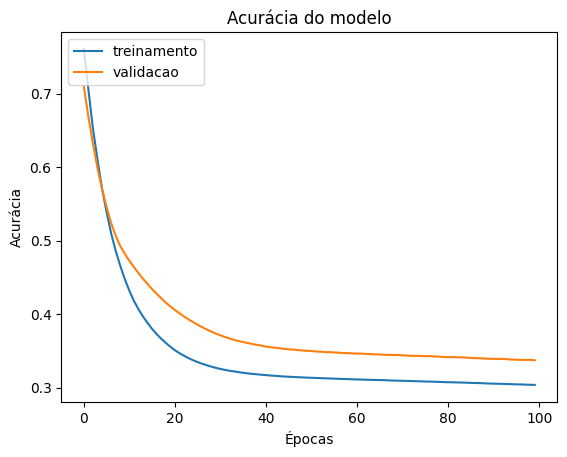

In [14]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(x_test, y_test))
plt.plot(history.history['mae'], label = 'treinamento')
plt.plot(history.history['val_mae'], label='validacao')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treinamento', 'validacao'], loc='upper left')
plt.show()

## Etapa 07
Realizar algumas predições.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


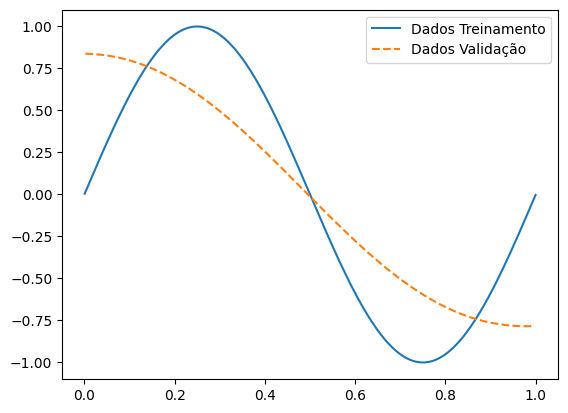

In [15]:
y_pred = model.predict(x_test)

plt.plot(x_train, y_train, '-', label='Dados Treinamento')
plt.plot(x_test, y_pred, '--', label='Dados Validação')
plt.legend()

In [10]:
model.evaluate(x_train, y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - mae: 0.0327 


[0.0016100568464025855, 0.015384125523269176]